<a href="https://colab.research.google.com/github/Himanshu-sharmaonline/Hands-On-work/blob/main/Circle_rectangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
values1=[]
values2=[]
for i in range(1000000):
  a=random.randint(-20,20)/10
  b=random.randint(-20,20)/10
  radius=2
  if (a)**2 + (b)**2 == radius**2: 
    values1.append(a)
    values2.append(b)

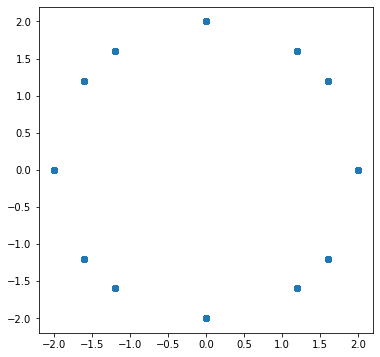

In [3]:
plt.figure(figsize=[6,6])
plt.scatter(values1,values2)

<h2>cos0=base/hypo</h2>
Base is 

In [4]:
x=[]
y=[]
for j in range(2,10):
  for i in range (1,361):
    x.append(np.cos(i)*j)
    y.append(np.sin(i)*j)

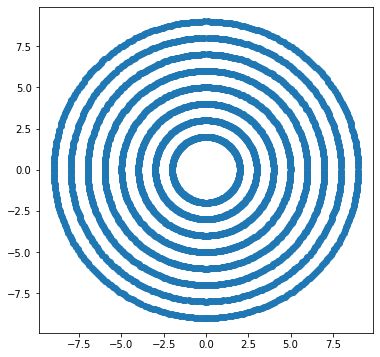

In [5]:
plt.figure(figsize=[6,6])
plt.scatter(x,y)
# plt.plot([0,4],[0,0])
plt.show()

In [9]:
from PIL import Image
import glob
import pandas as pd
import torch
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import itertools
import os
import shutil
import cv2
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
run=pd.DataFrame()
run["file"]=""
run["label"]=""
a=[]
b=[]
for i in glob.glob("*.png"):
  if i.startswith("circle"):
    b.append("circle")
    a.append(i)
  elif i.startswith('rect'):
    b.append("rect")
    a.append(i)
run["label"]=b
run["file"]=a

In [3]:
input=[]
for i in run.index:
  a = cv2.imread(run["file"][i])
  img_resized = cv2.resize(a,(224,224))
  img_vgg16=tf.keras.applications.vgg16.preprocess_input(img_resized)
  input.append(np.array(img_vgg16)/255)
input=np.array(input)

In [4]:
print ("number of training examples = " + str(input.shape[0]))
print("Shape of each image ",input.shape)

number of training examples = 50
Shape of each image  (50, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


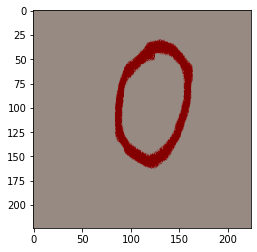

In [5]:
plt.imshow(input[1],interpolation='nearest')
plt.show()

In [12]:
# GRADED FUNCTION: imagePredictor

def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))  #make the size 1/2 from the input size
    model.add(Dropout(0.25))# Dropout of 25% 
    #second layer again has two layers with 64 filters of window size 3x3
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))  
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))  #make the size 1/2 from the input size
    model.add(Dropout(0.25))  # Dropout of 25% 
    #third layer again has two layers with 64 filters of window size 3x3
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))  #make the size 1/2 from the input size
    model.add(Dropout(0.25))  # Dropout of 25% 
    #Flattening the shape with another dense layer of 512 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))  # Dropout of 50% 
    model.add(Dense(2, activation='softmax'))  #Softmax output is created as Onehot encoding.
    return model

input_shape=input.shape[1:]   #input==> array(inputsize, rows ,columns , dim)
imagePredictor = createModel()
imagePredictor.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [13]:
imagePredictor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)       

In [14]:
values = np.array(run['label'].tolist()).reshape(-1,1)
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(values)

In [15]:
imagePredictor.fit(input,onehot_encoded,epochs=10,batch_size=5)

Epoch 1/10
10/10 [==============================] - 18s 2s/step - loss: 0.9552 - accuracy: 0.4590
Epoch 2/10
10/10 [==============================] - 16s 2s/step - loss: 0.6901 - accuracy: 0.5055
Epoch 3/10
10/10 [==============================] - 17s 2s/step - loss: 0.6946 - accuracy: 0.5998
Epoch 4/10
10/10 [==============================] - 17s 2s/step - loss: 0.6907 - accuracy: 0.5091
Epoch 5/10
10/10 [==============================] - 17s 2s/step - loss: 0.6799 - accuracy: 0.4166
Epoch 6/10
10/10 [==============================] - 17s 2s/step - loss: 0.6123 - accuracy: 0.5543
Epoch 7/10
10/10 [==============================] - 17s 2s/step - loss: 1.0932 - accuracy: 0.7478
Epoch 8/10
10/10 [==============================] - 17s 2s/step - loss: 0.4167 - accuracy: 0.8073
Epoch 9/10
10/10 [==============================] - 17s 2s/step - loss: 0.4114 - accuracy: 0.7682
Epoch 10/10
10/10 [==============================] - 18s 2s/step - loss: 0.5719 - accuracy: 0.7557


In [16]:
run=pd.DataFrame()
run["file"]=""
a=[]
for i in glob.glob("test*.png"):
  a.append(i)
  print(i) 
run["file"]=a

test_circle1.png
test_rect.png
test_rect1.png


In [17]:
run["array"]=""
test=[]
for i in run.index:
  a = cv2.imread(run["file"][i])
  img_resized = cv2.resize(a,(224,224))
  img_vgg16=tf.keras.applications.vgg16.preprocess_input(img_resized)
  run["array"][i]=np.array(img_vgg16)/255
  test.append(np.array(img_vgg16)/255)

In [18]:
input=np.array(test)

In [19]:
run

,file,array
0,test_circle1.png,"[[[0.5923961, 0.54204315, 0.51498044], [0.5923..."
1,test_rect.png,"[[[0.5923961, 0.54204315, 0.51498044], [0.5923..."
2,test_rect1.png,"[[[0.5923961, 0.54204315, 0.51498044], [0.5923..."


In [20]:
input.shape

(3, 224, 224, 3)

In [21]:
a=imagePredictor.predict(input)

In [22]:
a

array([[0.83553386, 0.16446617],
       [0.37969312, 0.6203069 ],
       [0.48327598, 0.516724  ]], dtype=float32)

In [23]:
def softmax(x):
    b=max(x)
    return [1 if i==b else 0 for i in x]

In [24]:
a=[softmax(i) for i in a ]

In [25]:
onehot_encoder.inverse_transform(a)

array([['circle'],
       ['rect'],
       ['rect']], dtype='<U6')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


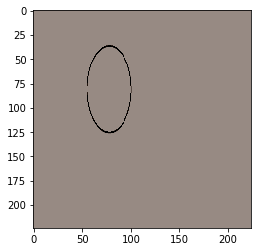

In [26]:
plt.imshow(input[0],interpolation='nearest')
plt.show()